In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
#ambali is denoted by 1 and belna by 0
from PIL import Image

In [2]:
arr=glob.glob("C:/Users/ashut/Downloads/EE604-Assign1-pictures/*")
arr

['C:/Users/ashut/Downloads/EE604-Assign1-pictures\\1.jpg',
 'C:/Users/ashut/Downloads/EE604-Assign1-pictures\\2.jpg',
 'C:/Users/ashut/Downloads/EE604-Assign1-pictures\\3.jpg',
 'C:/Users/ashut/Downloads/EE604-Assign1-pictures\\jigsaw.jpg']

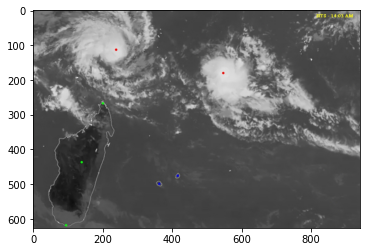

In [3]:
img1=(cv2.imread(arr[0],1))[:, :, [2, 1, 0]]
img2=(cv2.imread(arr[1],1))[:, :, [2, 1, 0]]
img3=(cv2.imread(arr[2],1))[:, :, [2, 1, 0]]
plt.imshow(img1)

[(265, 202), (433, 140), (615, 95)]


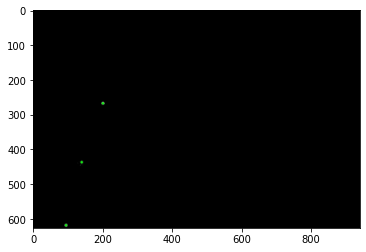

In [4]:
img_hsv=cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)
mask1 = cv2.inRange(img_hsv, (50, 25, 25), (70, 255,255))
output_img1 = img1.copy()
output_img1[np.where(mask1==0)] = 0
plt.imshow(output_img1)

n=-80
a=[]
for i in range(0,img1.shape[0]):
    for j in range(0,img1.shape[1]):
        if (mask1[i,j]!=0 ):
            if(i-n>20):
                a.append((i+2,j+2))
                
                n=i
green=a
print(green)

[(474, 416), (496, 364)]


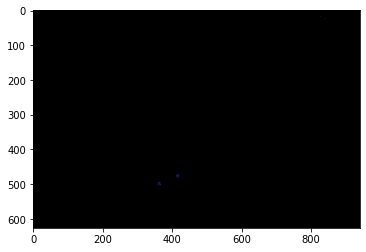

In [5]:
mask2 = cv2.inRange(img_hsv, (120,50,50), (130,255,255))
output_img2 = img1.copy()
output_img2[np.where(mask2==0)] = 0

plt.imshow(output_img2)
n=-80
a=[]
for i in range(0,img1.shape[0]):
    for j in range(0,img1.shape[1]):
        if (mask2[i,j]!=0 and i>100):
            if(i-n>20):
                a.append((i+2,j+2))
                
                n=i
blue=a
print(blue)

In [6]:
def findpos_red(img):
    img_hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(img_hsv, (0,50,50), (10,255,255))
    n=-80
    a=[]
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            if (mask[i,j]!=0):
                if(i-n>20):
                    a.append((i+2,j+2))
                    n=i
    
    return a

In [7]:
red=[]
red.append(findpos_red(img1))
red.append(findpos_red(img2))
red.append(findpos_red(img3))
red

[[(112, 238), (179, 547)], [(121, 223), (187, 540)], [(132, 217), (194, 530)]]

In [8]:

def distance(point1,point2):
    xdiff=point1[0]-point2[0]
    xdiff=xdiff*xdiff
    
    ydiff=point1[1]-point2[1]
    ydiff=ydiff*ydiff
    
    return np.sqrt(xdiff+ydiff)

In [9]:
#ambali is denoted by 1 and belna is denoted by 0

t1=41 #time is in minutes
t2=55 #time is in minutes

km_1500=np.round(distance(green[0],green[2]))
km_per_pixel_0=1500/km_1500

km_250=np.round(distance(blue[0],blue[1]))
km_per_pixel_1=250/km_250

#velocity is calculated by total distance by cyclone and time taken in the three pictures
#then they are normalized through left and right distances

v_belna=(((distance(red[0][0],red[1][0])+distance(red[1][0],red[2][0]))*km_per_pixel_0)*60)/(t1+t2)
v_ambali=(((distance(red[0][1],red[1][1])+distance(red[1][1],red[2][1]))*km_per_pixel_1)*60)/(t1+t2)

print(v_belna,v_ambali)

76.90271457653064 63.71847496782465


# for calculating the apojuncture

In [10]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

t=line_intersection((red[1][0],red[2][0]),(red[1][1],red[2][1]))
t

(586.7205882352941, -31.029411764705884)

Distance from apojuncture  942.4543589075247  km


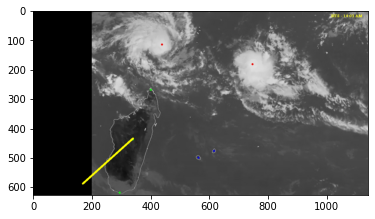

In [11]:
#distance between capital and apojuncture
d=distance(t,green[1])*km_per_pixel_0
print("Distance from apojuncture ",d, " km")




im = Image.open(arr[0])
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result
im_new = add_margin(im, 0, 0, 0, 200, (0, 0, 0))
image=np.array(im_new)
plt.imshow(image)
start_point=(-31+200,587)
end_point=(green[1][1]+200,green[1][0])
color=(255, 255, 0)
thickness=5
image = cv2.line(image, start_point ,end_point, color, thickness)

plt.imshow(image)

# for calculating time of collision


In [12]:
average_km_per_pixel=(km_per_pixel_0+km_per_pixel_1)/2

d_from_ambali=distance(t,red[2][1])*average_km_per_pixel
d_from_belna=distance(t,red[2][0])*average_km_per_pixel

time_for_ambali=d_from_ambali/v_ambali
time_for_belna=d_from_belna/v_belna

print("Time taken by ambali is " ,time_for_ambali, " hrs\n")
print("Time taken by belna is " ,time_for_belna,  " hrs\n")

Time taken by ambali is  46.01414997259991  hrs

Time taken by belna is  28.836204825152564  hrs



### Since time is different for both cyclones is different they will not actually collide

# Visualization

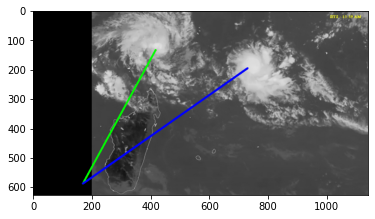

In [13]:
from PIL import Image

im = Image.open(arr[2])
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result
im_new = add_margin(im, 0, 0, 0, 200, (0, 0, 0))
image=np.array(im_new)
plt.imshow(image)
start_point=(-31+200,587)
end_point=(red[2][0][1]+200,red[2][0][0])
color=(0, 255, 0)
thickness=5
image = cv2.line(image, start_point ,end_point, color, thickness)

end_point=(red[2][1][1]+200,red[2][1][0])
color=(0, 0, 255)
image = cv2.line(image, start_point ,end_point, color, thickness)
plt.imshow(image)